## Project 2: Global Population vs Greenhouse Gas Emissions (World Bank Data)

In this project, I explore the long-term relationship between global population growth and global GHG emissions. The question is simple: as the world population increases, how do GHG emissions change over time?

I use two publicly available datasets from the World Bank:
- Total population (indicator: SP.POP.TOTL)
- Greenhouse gas emissions including CO₂ (indicator: EN.ATM.GHGT.KT.CE)

The goal is to clean and merge the datasets using pandas, create a single visualization, and interpret what the long-run trend suggests about population growth and environmental impact.

## Data Sources

Population, total (SP.POP.TOTL)
- World Bank Data: https://data.worldbank.org/indicator/SP.POP.TOTL

Greenhouse gas emissions, CO₂ equivalent (EN.ATM.GHGT.KT.CE) 
- World Bank Data: https://data.worldbank.org/indicator/EN.ATM.GHGT.KT.CE

I downloaded each as CSV files directly from the World Bank and will load them using pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the datasets

I load the population dataset and the greenhouse gas emissions dataset.  
Both datasets contain annual values for each country. 
For this project, I focus on global totals, so I select the row labeled "World".

In [2]:
population_path = "/Users/rosawang/project2/world_population.csv"
ghg_path = "/Users/rosawang/project2/green_house_gas_emission.csv"

import pandas as pd
pop = pd.read_csv(population_path)
ghg = pd.read_csv(ghg_path)

pop = pd.read_csv(population_path, skiprows=4)
ghg = pd.read_csv(ghg_path, skiprows=4)

pop.head()
ghg.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.MT.CE.AR5,0.0367,0.0415,0.0524,0.0574,0.0566,0.0707,...,0.4695,0.4910,0.5145,0.4961,0.4955,0.5890,0.4822,0.5312,0.5336,0.5615
1,Africa Eastern and Southern,AFE,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.MT.CE.AR5,525.5465,527.2004,540.7480,569.6089,583.0772,600.9151,...,1389.3735,1386.5722,1407.4312,1423.8750,1444.9125,1476.0819,1421.7752,1443.8112,1443.9357,1447.7204
2,Afghanistan,AFG,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.MT.CE.AR5,15.4374,15.3641,13.3166,13.9349,15.1779,15.8431,...,27.4201,27.4083,26.6340,27.6919,27.5533,26.9828,26.6463,27.6431,28.6141,29.4601
3,Africa Western and Central,AFW,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.MT.CE.AR5,281.0262,298.3866,333.5716,372.7198,411.8109,359.5206,...,783.6105,796.9121,808.1489,825.0809,852.7216,884.5371,866.4966,886.6322,893.4701,906.0481
4,Angola,AGO,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.MT.CE.AR5,18.9988,18.8661,21.4590,23.0189,23.6854,22.5196,...,77.2957,81.7750,78.8759,73.4244,69.5046,69.9108,61.6801,64.4090,67.2108,67.7008


## Data cleaning

The World Bank CSV format stores the values in a “wide format” with one row per country and one column per year (e.g., `1960`, `1961`, …, `2023`).  
I convert both datasets from wide format to long format and keep only the rows where the country is "World".

Then, I convert the `Year` column to numeric type and drop missing values.

In [3]:
pop_world = pop[pop["Country Name"] == "World"]

pop_long = pop_world.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="Population"
)

pop_long["Year"] = pd.to_numeric(pop_long["Year"], errors="coerce")

pop_long = pop_long.dropna(subset=["Year", "Population"])

pop_long.head()

,Country Name,Country Code,Year,Population
2,World,WLD,1970.0,3680589045.0
3,World,WLD,1971.0,3758613546.0
4,World,WLD,1972.0,3834446322.0
5,World,WLD,1973.0,3911068458.0
6,World,WLD,1974.0,3987294240.0


In [4]:
ghg_world = ghg[ghg["Country Name"] == "World"]

ghg_long = ghg_world.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="GHG_Emissions"
)

ghg_long["Year"] = pd.to_numeric(ghg_long["Year"], errors="coerce")
ghg_long = ghg_long.dropna(subset=["Year", "GHG_Emissions"])

ghg_long.head()

,Country Name,Country Code,Year,GHG_Emissions
2,World,WLD,1970.0,24002.751737
3,World,WLD,1971.0,24048.408217
4,World,WLD,1972.0,24971.278726
5,World,WLD,1973.0,26185.418698
6,World,WLD,1974.0,26182.14842


## Merging the datasets

Next, I merge the two long-format datasets by year so that for each year, I have both population and GHG emissions.

In [5]:
merged = pd.merge(
    pop_long[["Year", "Population"]],
    ghg_long[["Year", "GHG_Emissions"]],
    on="Year",
    how="inner"
)

merged.head(), merged.tail()

(     Year    Population GHG_Emissions
 0  1970.0  3680589045.0  24002.751737
 1  1971.0  3758613546.0  24048.408217
 2  1972.0  3834446322.0  24971.278726
 3  1973.0  3911068458.0  26185.418698
 4  1974.0  3987294240.0   26182.14842,
       Year    Population GHG_Emissions
 49  2019.0  7778303912.0   51278.34792
 50  2020.0  7855075060.0  49327.538885
 51  2021.0  7920861888.0  51568.250032
 52  2022.0  7990399768.0  51968.471601
 53  2023.0  8064976601.0  52962.900859)

## Visualization: Global Population vs GHG Emissions (1970–2023)

The figure below shows a merged line chart with two y-axes:
- Left axis: global population (in billions)  
- Right axis: greenhouse gas emissions (in kilotons CO₂-equivalent)

Using two axes allows both variables to be displayed in natural scale without forcing either one to flatten out.  
The goal is to compare long-run patterns between population growth and global emissions from 1970 through 2023.

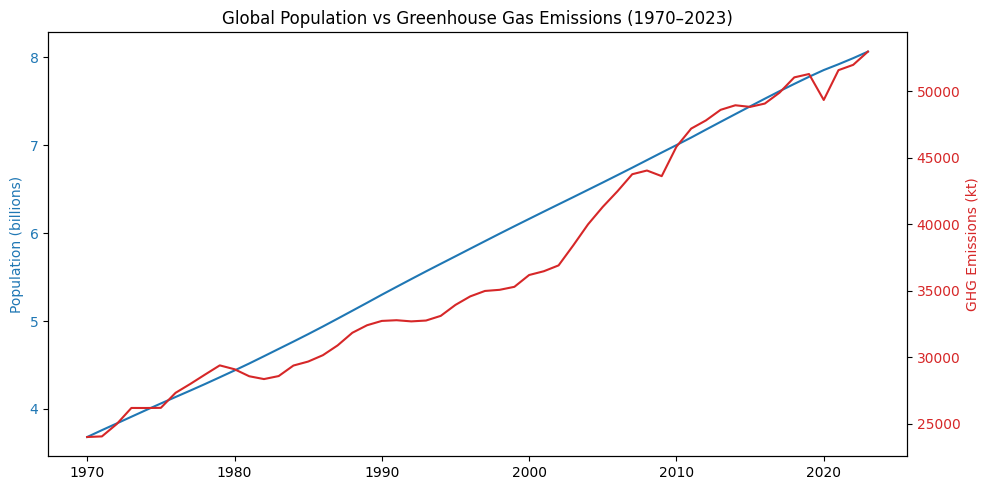

In [6]:
plt.figure(figsize=(10,5))

ax1 = plt.gca()
ax1.plot(merged["Year"], merged["Population"]/1_000_000_000,
         color="tab:blue", label="Population (billions)")
ax1.set_ylabel("Population (billions)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(merged["Year"], merged["GHG_Emissions"],
         color="tab:red", label="GHG Emissions (kt)")
ax2.set_ylabel("GHG Emissions (kt)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Global Population vs Greenhouse Gas Emissions (1970–2023)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

## Takeaways

- Global population rises steadily and predictably from 1970 to 2023, increasing from roughly 3.7 billion to more than 8 billion people.
- GHG emissions grow much faster than population from 1970 through the mid-2010s, suggesting that economic expansion and energy consumption, not population alone, drive most of the increase.
- Emissions begin to level off or decline slightly after ~2010, while population continues to rise. This indicates a partial decoupling: the world is still growing demographically, but emissions are no longer increasing at the same pace.
- The divergence after 2010 aligns with renewable energy adoption, efficiency gains, and policy actions in higher-income economies, although emissions remain high overall.
- The combined trends show that population growth alone cannot explain global emissions, the relationship depends heavily on technology, energy mix, industrial structure, and policy choices.

## Caveats and Limitations

- The emissions series measures CO₂-equivalent, not CO₂ alone, and includes multiple greenhouse gases with different measurement uncertainties.
- Year-to-year fluctuations in emissions are strongly affected by economic cycles, fuel prices, policy changes, and geopolitical shocks (e.g., recessions, oil crises, the COVID-19 slowdown).
- Some years in the World Bank dataset contain interpolated or estimated values, especially for the most recent period, which may slightly smooth the trend.
- Population is measured more consistently and with smaller error margins than emissions, which makes their comparison descriptive rather than causal.
- This analysis does not identify causality, it illustrates long-run co-movements rather than testing whether population changes “cause” shifts in emissions.